In [153]:
pip install pandas plotly ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [159]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, Markdown

In [157]:
df = pd.read_csv(r"C:\Users\karti\Downloads\BI&A_Case_Study_Netflix_data.csv")

In [101]:
from IPython.display import display, Markdown
total_views = df.shape[0]
total_duration = df["duration_watched_minutes"].sum()
avg_duration = total_duration / total_views

In [102]:
df.head()

,user_id,show_watched,duration_watched_minutes,date_watched,gender,age,subscription_type,device_used,rating_given,location,watching_method
0,8270,House of Cards,35.150002,00:00.0,Female,30.0,Standard,Tablet,2,France,Binge-watched
1,1860,House of Cards,35.490002,01:00.0,Male,NaN,Standard,Tablet,3,Germany,Watched weekly
2,6390,BoJack Horseman,14.120000,02:00.0,Male,15.0,Standard,TV,3,Germany,Binge-watched
3,6191,BoJack Horseman,48.570000,03:00.0,Female,20.0,Standard,NaN,1,Australia,Watched daily
4,6734,The Umbrella Academy,34.080002,04:00.0,Male,31.0,Premium,Tablet,5,Australia,Watched weekly


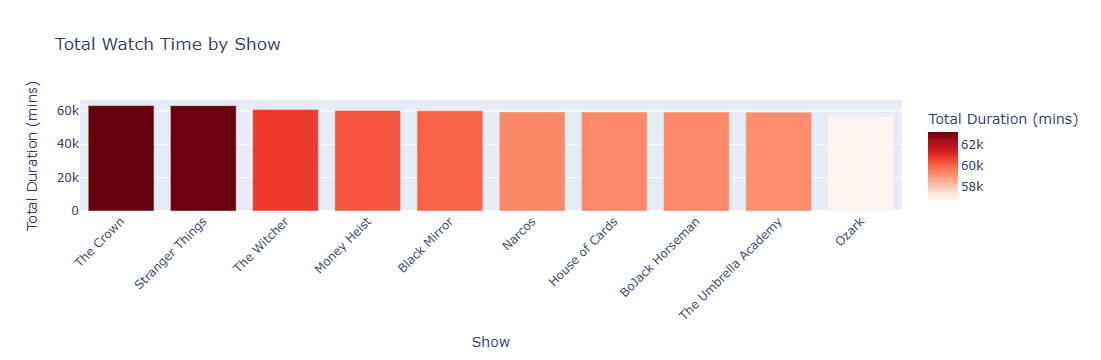

In [161]:
import plotly.express as px

# Group data by show and calculate total duration watched
duration_by_show = df.groupby("show_watched", as_index=False)["duration_watched_minutes"].sum()

# Sort the shows by duration (optional)
duration_by_show = duration_by_show.sort_values(by="duration_watched_minutes", ascending=False)

# Create bar chart
fig = px.bar(duration_by_show,
             x="show_watched",
             y="duration_watched_minutes",
             title="Total Watch Time by Show",
             labels={"show_watched": "Show", "duration_watched_minutes": "Total Duration (mins)"},
             color="duration_watched_minutes",
             color_continuous_scale="reds")

fig.update_layout(xaxis_tickangle=-45)
fig.show()


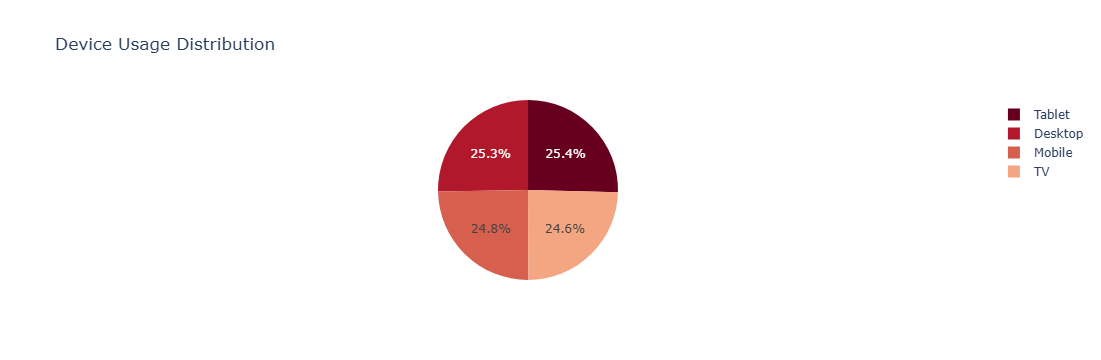

In [163]:
# Group by device_used and count views
device_counts = df["device_used"].value_counts().reset_index()
device_counts.columns = ["device_used", "views"]

# Create pie chart
fig = px.pie(device_counts, 
             names="device_used", 
             values="views",
             title="Device Usage Distribution",
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()


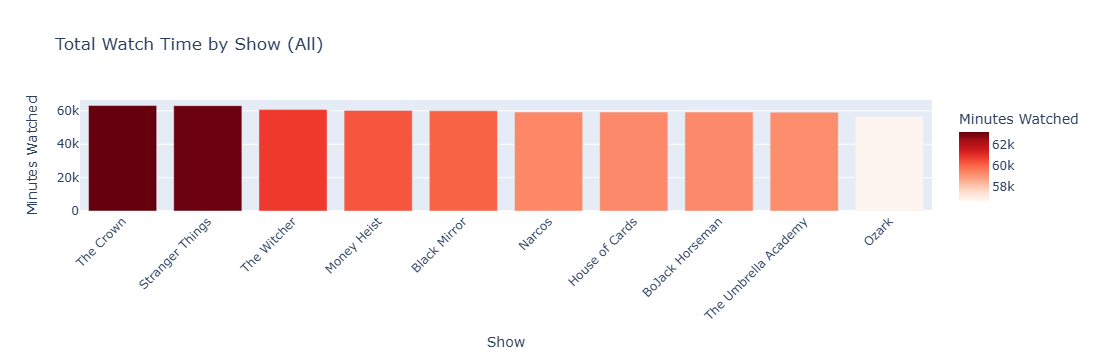

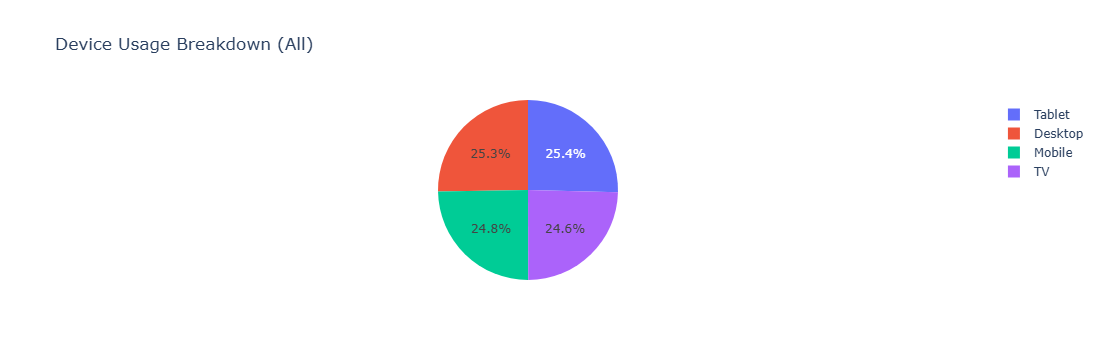

In [105]:
# Dropdown for location filter
loc_dropdown = widgets.Dropdown(
    options=["All"] + sorted(df["location"].unique()),
    description="Location:"
)

def update_charts(change):
    loc = change['new']
    clear_output(wait=True)

    if loc == "All":
        data = df
    else:
        data = df[df["location"] == loc]

    # Group by show and sum durations
    grouped = data.groupby("show_watched")["duration_watched_minutes"].sum().reset_index()
    grouped = grouped.sort_values("duration_watched_minutes", ascending=False)

    # Bar chart with color gradient
    fig_bar = px.bar(
        grouped,
        x="show_watched",
        y="duration_watched_minutes",
        title=f"Total Watch Time by Show ({loc})",
        labels={"show_watched": "Show", "duration_watched_minutes": "Minutes Watched"},
        color="duration_watched_minutes",
        color_continuous_scale="Reds"
    )
    fig_bar.update_layout(xaxis_tickangle=-45)
    fig_bar.show()

    # Device usage pie chart
    device_counts = data["device_used"].value_counts().reset_index()
    device_counts.columns = ["device_used", "count"]

    fig_pie = px.pie(
        device_counts,
        names="device_used",
        values="count",
        title=f"Device Usage Breakdown ({loc})"
    )
    fig_pie.show()

display(loc_dropdown)
loc_dropdown.observe(update_charts, names="value")

# Show all data initially
update_charts({'new': 'All'})


In [106]:
from IPython.display import display, Markdown

def show_kpis(data):
    total_views = data.shape[0]
    total_duration = data["duration_watched_minutes"].sum()
    avg_duration = total_duration / total_views if total_views else 0

    display(Markdown(f"### Total Views: {total_views:,}"))
    display(Markdown(f"### Total Watch Time: {total_duration:,} minutes"))
    display(Markdown(f"### Avg Duration per View: {avg_duration:.2f} minutes"))

# Show KPIs for all data initially
show_kpis(df)


### Total Views: 10,000

### Total Watch Time: 601,304.2478525444 minutes

### Avg Duration per View: 60.13 minutes

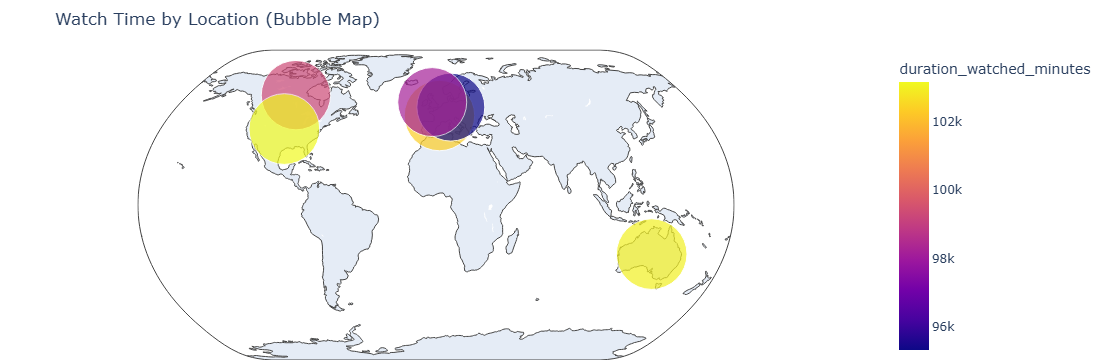

In [107]:
import plotly.express as px

# Aggregate watch time by location
location_data = df.groupby("location")["duration_watched_minutes"].sum().reset_index()

fig = px.scatter_geo(
    location_data,
    locations="location",
    locationmode="country names",  # Change if your location data differ
    size="duration_watched_minutes",
    color="duration_watched_minutes",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Watch Time by Location (Bubble Map)",
    hover_name="location",
    size_max=50,
    projection="natural earth"
)

fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


In [148]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Dropdown for location
location_filter = widgets.Dropdown(
    options=['All'] + sorted(df['location'].dropna().unique()),
    description='Location:'
)

# Output box for charts
output_box = widgets.Output()

def update_dashboard(change):
    selected_location = change['new']
    
    with output_box:
        clear_output(wait=True)
        
        # Dashboard title
        display(HTML("<h3 style='color: red; font-weight: bold; text-align: center;'>Netflix : Streaming Insights Dashboard</h3>"))
        
        # Filter data
        if selected_location == 'All':
            data = df.copy()
        else:
            data = df[df['location'] == selected_location]
        
        # Map - Watch time by location
        loc_data = data.groupby('location')['duration_watched_minutes'].sum().reset_index()
        fig_map = px.scatter_geo(
            loc_data,
            locations='location',
            locationmode='country names',
            size='duration_watched_minutes',
            color='duration_watched_minutes',
            color_continuous_scale='Plasma',
            title='Watch Time by Location',
            projection='natural earth',
            hover_name='location',
            size_max=30
        )
        fig_map.update_layout(margin=dict(l=0, r=0, t=40, b=0))
        fig_map.show()
        
        # Bar chart - Watch time by show
        show_data = data.groupby('show_watched')['duration_watched_minutes'].sum().reset_index()
        show_data = show_data.sort_values('duration_watched_minutes', ascending=False)
        fig_bar = px.bar(
            show_data,
            x='show_watched',
            y='duration_watched_minutes',
            color='duration_watched_minutes',
            color_continuous_scale='Reds',
            title='Total Watch Time by Show'
        )
        fig_bar.update_layout(xaxis_tickangle=-45)
        fig_bar.show()
        
        # Pie chart - Device usage
        device_data = data['device_used'].value_counts().reset_index()
        device_data.columns = ['device_used', 'count']
        fig_pie = px.pie(
            device_data,
            names='device_used',
            values='count',
            title='Device Usage'
        )
        fig_pie.show()

# Trigger update when dropdown is changed
location_filter.observe(update_dashboard, names='value')

# Show filter and output
display(location_filter, output_box)

# Run once to show full dashboard on load
update_dashboard({'new': 'All'})

Dropdown(description='Location:', options=('All', 'Australia', 'Canada', 'France', 'Germany', 'UK', 'US'), val…

Output()